# Reads a single float and uses the meteo

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import glob
import seawater as sw
from soccom_functions import *
import pickle 
import datetime
import xarray as xr
import pandas as pd 
import plotly.graph_objs as go
import cmocean

In [5]:
#!conda install -c conda-forge argopy

^C


## Reads float data

In [6]:
#reads float data
file_folder = "../../data/raw/WGfloats/"
#file_folder = "../../data/raw/LowRes"
float_number = "5904397" #7900918 #9094

files = sorted(glob.glob(file_folder+"/*"+float_number+"*.nc"))
print(files)
#files = sorted(glob.glob(file_folder+"/*.nc"))

['../../data/raw/WGfloats\\5904397_HRQC.nc']


data = xr.open_dataset(files[0]) # from SOCCOM snapshots
#data = data.rename({'CYCLE_NUMBER':'PROF_NUM'}).swap_dims({'N_PROF':'PROF_NUM'})
display(data)

data = xr.open_dataset(files[1]) #from ftp sprof
data = data.rename({'CYCLE_NUMBER':'PROF_NUM'}).swap_dims({'N_PROF':'PROF_NUM'})
display(data)

data = xr.open_dataset(files[2]) # from ftp (prof)
data = data.rename({'CYCLE_NUMBER':'PROF_NUM'}).swap_dims({'N_PROF':'PROF_NUM'})
display(data)

In [7]:
#uses the function that reads and grids the data
FLOAT = grids_one_buoy(files[0],display_info = False, DO_ml_crit = 2.5, clear_short = True)

#the gridded data is located in the dictionary FLOAT.gr, and contains the following variables
print(FLOAT.gr.keys())
print(FLOAT.raw_bg.keys())
#some of them are standard and others related to thorpe scales and mixing, and you also have geopotential anomalies (gpa) integrated between 500 and 1500 m (gpa_500_1500)

print("This float is WMO code: %s"%(FLOAT.gr["WMO_code"]))


#fmet = open("float_pickles/ERA_hr_"+FLOAT.raw["code"]+".pi","rb")
#FLOAT.methr = pickle.load( fmet )
#FLOAT.methr["time64"] = np.copy( FLOAT.methr["time"] )
#FLOAT.methr["time"] = convert_datetime64_to_time(FLOAT.methr["time64"])
#FLOAT.methr["date"] = convert_datetime64_to_date(FLOAT.methr["time64"])
#FLOAT.calculates_carbon_framework(sp = FLOAT.methr["sp"], timemet = FLOAT.methr["time"], ML_zero = False)
#CFvars = FLOAT.gr["CF"].keys()

#carbon flux
#FLOAT.calculates_CO2_O2_flux(FLOAT.methr)

C:\Users\Clara Douglas\OneDrive - University of Southampton\PhD\Projects\net_community_production\notebooks\FromBieito\soccom_functions.py:338: RuntimeWarning: Mean of empty slice
  self.gr["LT"][j,i] = np.nanmean(disp[jj]**2)**0.5


dict_keys(['depth', 'date', 'Lon', 'Lat', 'code', 'WMO_code', 'Pressure', 'Temperature', 'Salinity', 'SA', 'CT', 'Sigma_theta', 'gamma_n', 'N2', 'PV', 'Oxygen', 'OxygenSat', 'Nitrate', 'DIC_LIAR', 'TALK_LIAR', 'pCO2_LIAR', 'Chl_a', 'Chl_a_corr', 'POC', 'LT', 'mld', 'mld_HT', 'mld_DO', 'LT_ml', 'LT_ov', 'LT_largest_ov', 'size_largest_ov', 'h_largest_ov', 'h_no_ov', 'gpa', 'gpa_500_1500', 'AOU'])
dict_keys(['Oxygen', 'OxygenSat', 'Nitrate', 'DIC_LIAR', 'TALK_LIAR', 'pCO2_LIAR', 'Chl_a', 'Chl_a_corr', 'POC'])
This float is WMO code: 5904397


In [9]:
#plt.plot(FLOAT.gr["date"], FLOAT.gr["FCO2_all"],".")

## Initial plot of the float main variables and position

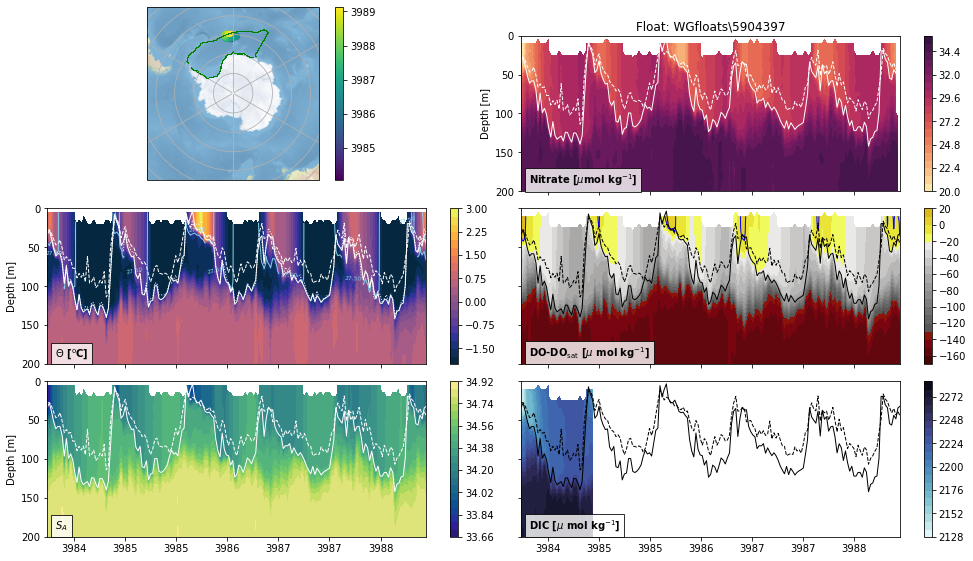

In [10]:
%matplotlib inline 
#qt
studyarea=pd.read_csv('../../data/processed/ANDREXbox.csv',header=None).values


#with this command you can have an overview of the float data 
FLOAT.plots_map_main_variables(studyarea, shows = True, saves = False,  ylim=  (200,0))
#FLOAT.plots_mixing_layer_profile(20, show = True)

#plt.plot(FLOAT.gr["date"],FLOAT.gr["gpa_500_1500"])

[-56.79229202 -56.78618164 -56.78007239 ... -59.62825    -59.127778
 -56.79229202]


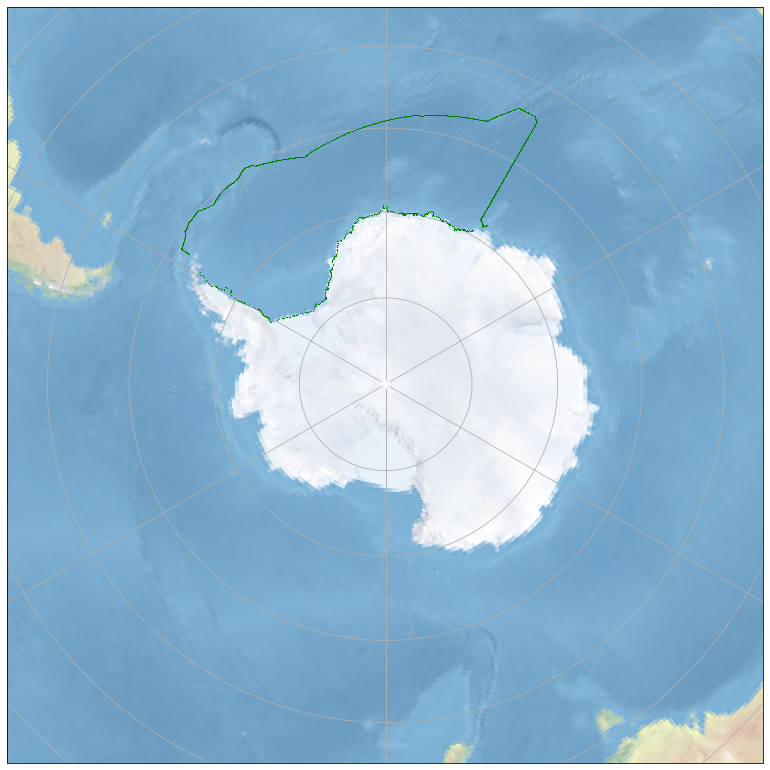

In [4]:
# to get ANDREX box plotted too
import pandas as pd
test=pd.read_csv('../../data/processed/ANDREXbox.csv',header=None).values
#print(test)

fig = plt.figure(figsize = (25,15))
proj = crs.LambertAzimuthalEqualArea(central_latitude=-90.0)
ax0 = fig.add_axes([0.10,0.1,0.7,0.7], projection = proj)
ax0.gridlines(draw_labels=False)
ax0.set_extent([-180, 180, -90, -45], crs.PlateCarree()) # originally -25 as north extent, will shorten to -45
ax0.stock_img()

box = ax0.plot([test[:,0]],[test[:,1]],transform = crs.PlateCarree(),color='green', marker=',', linestyle='dashed',linewidth=1.5, markersize=1.5)
               
plt.show()

print(test[:,0])

## Nitrate uptake

Deepest mixed layer: 178 m
-64.98648936170213
[ True  True  True  True False False]

-------------------------------------------------------------------------
YEAR	    NEP Nit	     <NEP Nit>	      NEP POC	      <NEP POC>
				 [mol/m2/yr]
-------------------------------------------------------------------------
2015-2016	 3.03		2.54		0.82		0.59
2016-2017	 4.07		2.51		0.61		0.56
2017-2018	 4.56		3.06		1.46		0.97
2018-2019	 3.87		2.76		1.15		1.08
2019-2020	 nan		nan		nan		nan
2020-2021	 nan		nan		nan		nan
-------------------------------------------------------------------------
Mean     	3.88		2.72		1.01		0.80
-------------------------------------------------------------------------


C:\Users\CLARAD~1\AppData\Local\Temp/ipykernel_11776/865690136.py:21: RuntimeWarning: Mean of empty slice
  dint_Nitrate = np.nanmean(FLOAT.gr["Nitrate"][:jh,:], axis = 0)*H*(1027/1e6)
C:\Users\CLARAD~1\AppData\Local\Temp/ipykernel_11776/865690136.py:23: RuntimeWarning: Mean of empty slice
  mSA = np.nanmean( FLOAT.gr["SA"][FLOAT.gr["depth"]>500,:], axis = 0 )


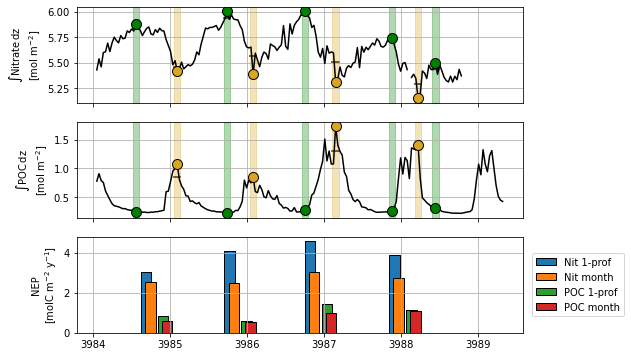

In [7]:
#first I convert the numerical date to a datetime format so I can get the month and year vectors
RCN = 106/16. # Redfield ratio

nt = FLOAT.gr["date"].size
dateDT = convert_time_to_date( FLOAT.gr["date"] )
year = np.full( nt, np.nan )
month = np.full(nt, np.nan)
for i in range(nt):
    year[i] = dateDT[i].year
    month[i] = dateDT[i].month

H = np.nanmax(FLOAT.gr["mld"]) # calculates the maximum ML
##### YOU COULD OVER-RIDE IT BY UN-COMMENTING
#H = 200.

print("Deepest mixed layer: %1.0f m"%(H))
jh = np.where( FLOAT.gr["depth"]>= H)[0][0] # gets the depth index for the maxmum mixed layer
print(np.nanmean(FLOAT.gr["Lat"]))

#depth integrated nitrate/POC
dint_Nitrate = np.nanmean(FLOAT.gr["Nitrate"][:jh,:], axis = 0)*H*(1027/1e6)
dint_POC = np.nanmean(FLOAT.gr["POC"][:jh,:], axis = 0)*H/1000.
mSA = np.nanmean( FLOAT.gr["SA"][FLOAT.gr["depth"]>500,:], axis = 0 )
#by multiplying by density ~1027 and dividing by 1e6 I get units mol m-2

#for each year calculates the maximum and minimum
Uyear = np.unique(year)
nyr = Uyear.size
date_nit_sum = np.full(nyr, np.nan)
date_nit_win = np.full(nyr, np.nan)
nit_win = np.full(nyr, np.nan)
nit_sum = np.full(nyr, np.nan)
nit_win_month_avg = np.full(nyr, np.nan)
nit_sum_month_avg = np.full(nyr, np.nan)

POC_win = np.full(nyr, np.nan)
POC_sum = np.full(nyr, np.nan)
POC_win_month_avg = np.full(nyr, np.nan)
POC_sum_month_avg = np.full(nyr, np.nan)

SA_win = np.full(nyr, np.nan)
SA_sum = np.full(nyr, np.nan)
Lat_win = np.full(nyr, np.nan)
Lat_sum = np.full(nyr, np.nan)
Lon_win = np.full(nyr, np.nan)
Lon_sum = np.full(nyr, np.nan)
flag_nit_NEP = np.full(nyr, False)
for i, yr in enumerate(Uyear):
    start_summer = datetime.datetime(int(yr),12,1,0,0).toordinal()
    end_summer = datetime.datetime(int(yr)+1,4,1,0,0).toordinal()
    it_summer = np.where( (FLOAT.gr["date"]>= start_summer) & (FLOAT.gr["date"]<= end_summer) )[0]
    if it_summer.size > 0:
        if np.sum(np.isfinite(dint_Nitrate[it_summer]))>0:
            imin_nit = it_summer[ np.nanargmin( dint_Nitrate[it_summer] ) ]
            date_nit_sum[i] = FLOAT.gr["date"][imin_nit]  
            nit_sum[i] =np.nanmin( dint_Nitrate[it_summer])
            POC_sum[i] = dint_POC[imin_nit]
            #ii_sum_month = np.where( np.abs(FLOAT.gr["date"] - FLOAT.gr["date"][imin_nit]  )<15 )[0]
            ii_sum_month = np.where( (month == month[imin_nit]) & (year == year[imin_nit])   )[0]
            nit_sum_month_avg[i] =np.nanmean( dint_Nitrate[ii_sum_month])
            POC_sum_month_avg[i] =np.nanmean( dint_POC[ii_sum_month])
            SA_sum[i] = mSA[imin_nit]
            Lat_sum[i] = FLOAT.gr["Lat"][imin_nit]
            Lon_sum[i] = FLOAT.gr["Lon"][imin_nit]
        
    start_winter = datetime.datetime(int(yr),5,1,0,0).toordinal()
    end_winter = datetime.datetime(int(yr),12,1,0,0).toordinal()
    it_winter = np.where( (FLOAT.gr["date"]>= start_winter) & (FLOAT.gr["date"]<= end_winter) )[0]
    if it_winter.size > 0:
        if np.sum(np.isfinite(dint_Nitrate[it_winter]))>0:
            imax_nit = it_winter[ np.nanargmax( dint_Nitrate[it_winter] ) ]
            date_nit_win[i] = FLOAT.gr["date"][imax_nit]  
            nit_win[i] = np.nanmax( dint_Nitrate[it_winter])
            POC_win[i] =  dint_POC[imax_nit]
            #ii_win_month = np.where( np.abs(FLOAT.gr["date"] - FLOAT.gr["date"][imax_nit]  )<15 )[0]
            ii_win_month = np.where( (month == month[imax_nit]) &  (year == year[imax_nit])   )[0]
            nit_win_month_avg[i] =np.nanmean( dint_Nitrate[ii_win_month])
            POC_win_month_avg[i] =np.nanmean( dint_POC[ii_win_month])
            SA_win[i] = mSA[imax_nit]
            Lat_win[i] = FLOAT.gr["Lat"][imax_nit]
            Lon_win[i] = FLOAT.gr["Lon"][imax_nit]

flag_nit_NEP = (np.abs(date_nit_win-date_nit_sum)<8*30) & (np.abs(SA_win-SA_sum)<0.05) & (np.abs(Lon_win-Lon_sum)<8.) & (np.abs(Lat_win-Lat_sum)<5.)
print(flag_nit_NEP)
        

#calculates net ecosystem production (molC m-2 yr-1)
NEP = (nit_win - nit_sum)*RCN
#from the monthly means
NEP_avg = (nit_win_month_avg - nit_sum_month_avg)*RCN

NEP_POC = -(POC_win - POC_sum)
NEP_POC_avg = -(POC_win_month_avg - POC_sum_month_avg)

#gets the date around the depletion
date_NEP = 0.5*(date_nit_sum +date_nit_win )
Lon_NEP = 0.5*(Lon_win+Lon_sum)
Lat_NEP = 0.5*(Lat_win+Lat_sum)

#Plots the results 
fig, ax = plt.subplots(3,1,figsize = (8,6), sharex = True)
ax[0].plot( FLOAT.gr["date"], dint_Nitrate, "k" )
l1,=ax[0].plot(date_nit_sum, nit_sum,"o", ms = 10, mec = "k", color = "goldenrod")
l2,=ax[0].plot(date_nit_win, nit_win,"o", ms = 10, mec = "k", color = "green")
for i in range(nyr):
    ax[0].plot([date_nit_sum[i]-15,date_nit_sum[i]+15], [nit_sum_month_avg[i],nit_sum_month_avg[i]], color = "k", zorder = -1)
    ax[0].plot([date_nit_win[i]-15,date_nit_win[i]+15], [nit_win_month_avg[i],nit_win_month_avg[i]], zorder = -1, color = "k")
yl = ax[0].get_ylim()
for i in range(nyr):
    ax[0].fill_between( [date_nit_sum[i]-15,date_nit_sum[i]+15], y1 = yl[0], y2 = yl[1], color = l1.get_color(), alpha = 0.3 )
    ax[0].fill_between( [date_nit_win[i]-15,date_nit_win[i]+15], y1 = yl[0], y2 = yl[1], color = l2.get_color(), alpha = 0.3 )

ax[0].set_ylim(yl)
ax[0].set_ylabel( "$\\int \\mathrm{Nitrate}\, \\rm d z$\n[mol m$^{-2}$]" )
ax[0].grid(True)


ax[1].plot( FLOAT.gr["date"], dint_POC, "k" )
l1,=ax[1].plot(date_nit_sum, POC_sum,"o", ms = 10, mec = "k", color = "goldenrod")
l2,=ax[1].plot(date_nit_win, POC_win,"o", ms = 10, mec = "k", color = "green")
for i in range(nyr):
    ax[1].plot([date_nit_sum[i]-15,date_nit_sum[i]+15], [POC_sum_month_avg[i],POC_sum_month_avg[i]], color = "k", zorder = -1)
    ax[1].plot([date_nit_win[i]-15,date_nit_win[i]+15], [POC_win_month_avg[i],POC_win_month_avg[i]], zorder = -1, color = "k")
yl = ax[1].get_ylim()
for i in range(nyr):
    ax[1].fill_between( [date_nit_sum[i]-15,date_nit_sum[i]+15], y1 = yl[0], y2 = yl[1], color = l1.get_color(), alpha = 0.3 )
    ax[1].fill_between( [date_nit_win[i]-15,date_nit_win[i]+15], y1 = yl[0], y2 = yl[1], color = l2.get_color(), alpha = 0.3 )

ax[1].set_ylim(yl)
ax[1].set_ylabel( "$\\int \\mathrm{POC}\, \\rm d z$\n[mol m$^{-2}$]" )
ax[1].grid(True)

ax[2].bar( date_NEP[flag_nit_NEP]-50, NEP[flag_nit_NEP], width = 50, ec = "k", label = "Nit 1-prof"  )
ax[2].bar( date_NEP[flag_nit_NEP]-30, NEP_avg[flag_nit_NEP], width = 50, ec = "k", label = "Nit month" )
ax[2].bar( date_NEP[flag_nit_NEP]+30, NEP_POC[flag_nit_NEP], width = 50, ec = "k", label = "POC 1-prof"  )
ax[2].bar( date_NEP[flag_nit_NEP]+50, NEP_POC_avg[flag_nit_NEP], width = 50, ec = "k", label = "POC month" )
ax[2].set_ylabel("NEP\n[molC m$^{-2}$ y$^{-1}$]")
ax[2].legend(loc = "center left", bbox_to_anchor = (1.01,0.5))
formatter = mdates.DateFormatter("%Y") ### formatter of the date
locator = mdates.YearLocator() ### where to put the labels
ax[2].xaxis.set_major_locator(locator)
ax[2].xaxis.set_major_formatter(formatter)
ax[2].grid(True)



print( "\n-------------------------------------------------------------------------")
print("YEAR\t    NEP Nit\t     <NEP Nit>\t      NEP POC\t      <NEP POC>" )
print("\t\t\t\t [mol/m2/yr]")
print( "-------------------------------------------------------------------------")
for i in range(nyr):
    print("%d-%d\t %1.2f\t\t%1.2f\t\t%1.2f\t\t%1.2f"%(Uyear[i],Uyear[i]+1, NEP[i], NEP_avg[i], NEP_POC[i], NEP_POC_avg[i])  )
print( "-------------------------------------------------------------------------")
print("Mean     \t%1.2f\t\t%1.2f\t\t%1.2f\t\t%1.2f"%(np.nanmean(NEP), np.nanmean(NEP_avg),np.nanmean(NEP_POC), np.nanmean(NEP_POC_avg)))
print( "-------------------------------------------------------------------------")

As you see the averages are slightly different, not sure why, probably due to a combination of interpolation for gridding the nitrate and also the vertical integration

# Oxygen consumption

C:\Users\CLARAD~1\AppData\Local\Temp/ipykernel_11776/4279449249.py:10: RuntimeWarning: Mean of empty slice
  dint_O2 = moving_average( np.nanmean(FLOAT.gr["Oxygen"][jh,:], axis = 0),10)
C:\Users\CLARAD~1\AppData\Local\Temp/ipykernel_11776/4279449249.py:11: RuntimeWarning: Mean of empty slice
  mSA = np.nanmean( FLOAT.gr["SA"][FLOAT.gr["depth"]>500,:], axis = 0 )


[-0.1465409   1.37398092  1.43265427  1.88265971         nan         nan]
[False  True  True  True False False]
1.5630983021585791


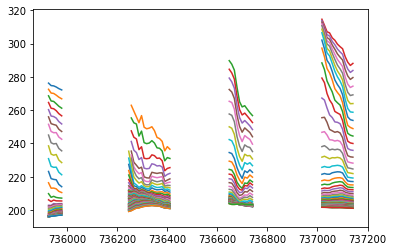

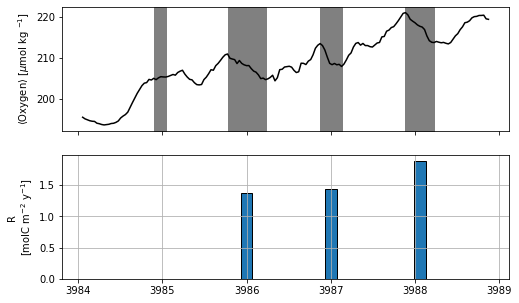

In [8]:
RCO = - 106./170.
maxz = 500.
minz = 100.
z= np.copy(FLOAT.gr["depth"])
dz = z[1]-z[0]
jh = np.where((z>=minz) & (z<=maxz))[0]


#depth integrated O2
dint_O2 = moving_average( np.nanmean(FLOAT.gr["Oxygen"][jh,:], axis = 0),10)
mSA = np.nanmean( FLOAT.gr["SA"][FLOAT.gr["depth"]>500,:], axis = 0 )

O2 = np.copy(FLOAT.gr["Oxygen"])
nz, nt = O2.shape
for j in range(nz):
    O2[j,:] = moving_average(O2[j,:],10)


zM = np.tile(z,(nt,1)).T
mldM = np.tile(FLOAT.gr["mld"],(nz,1))
ismld = zM<mldM
O2[ismld] = np.nan


#for each year calculates the maximum and minimum
Uyear = np.unique(year)
nyr = Uyear.size
date_O2_sum = np.full(nyr, np.nan)
date_O2_win = np.full(nyr, np.nan)
R_O2 = np.full(nyr, np.nan)

SA_O2_win = np.full(nyr, np.nan)
SA_O2_sum = np.full(nyr, np.nan)
Lat_O2_win = np.full(nyr, np.nan)
Lat_O2_sum = np.full(nyr, np.nan)
Lon_O2_win = np.full(nyr, np.nan)
Lon_O2_sum = np.full(nyr, np.nan)

for i, yr in enumerate(Uyear):
    start_winter = datetime.datetime(int(yr),8,1,0,0).toordinal()
    end_winter = datetime.datetime(int(yr),12,1,0,0).toordinal()
    it_winter = np.where( (FLOAT.gr["date"]>= start_winter) & (FLOAT.gr["date"]<= end_winter) )[0]
    imax_O2 = np.nan
    imin_O2 = np.nan
    if it_winter.size > 0:
        if np.sum(np.isfinite(dint_O2[it_winter]))>0:
            imax_O2 = it_winter[ np.nanargmax( dint_O2[it_winter] ) ]
            
    start_summer = datetime.datetime(int(yr)+1,1,1,0,0).toordinal()
    end_summer = datetime.datetime(int(yr)+1,4,1,0,0).toordinal()
    it_summer = np.where( (FLOAT.gr["date"]>= start_summer) & (FLOAT.gr["date"]<= end_summer) )[0]
    if it_summer.size > 0:
        if np.sum(np.isfinite(dint_O2[it_summer]))>0:
            imin_O2 = it_summer[ np.nanargmin( dint_O2[it_summer] ) ]

    if np.isfinite(imin_O2) and np.isfinite(imax_O2) and (imin_O2>imax_O2):
        iiy = np.arange( imax_O2, imin_O2+1  )
        dO2dt = np.full(nz, np.nan)
        for j in jh:
            ox = O2[j,iiy]
            time = FLOAT.gr["date"][iiy]
            iif = np.isfinite(ox)
            time = time[iif]
            ox = ox[iif]
            plt.plot(time,ox)
            p = np.polyfit(time,ox,1)
            #print(p[0])
            dO2dt[j] = p[0]*(time[-1]-time[0])
        R_O2[i] =  np.nansum( 0.5*(dO2dt[1:]+dO2dt[:-1])*1027*1e-6*RCO*(z[1:]-z[:-1]))#np.nansum(dz*dO2dt*1027*1e-6)*RCO
        date_O2_win[i] = FLOAT.gr["date"][imax_O2]  
        SA_O2_win[i] = mSA[imax_O2]
        Lat_O2_win[i] = FLOAT.gr["Lat"][imax_O2]
        Lon_O2_win[i] = FLOAT.gr["Lon"][imax_O2]
        date_O2_sum[i] = FLOAT.gr["date"][imin_O2]  
        SA_O2_sum[i] = mSA[imin_O2]
        Lat_O2_sum[i] = FLOAT.gr["Lat"][imin_O2]
        Lon_O2_sum[i] = FLOAT.gr["Lon"][imin_O2]

flag_O2_R = (np.abs(date_O2_win-date_O2_sum)>3*30) & (np.abs(SA_O2_win-SA_O2_sum)<0.05) & (np.abs(Lon_O2_win-Lon_O2_sum)<8.) & (np.abs(Lat_O2_win-Lat_O2_sum)<5.)        
        #plt.plot(FLOAT.gr["date"][iiy],O2[::5,:].T)
date_R = 0.5*(date_O2_sum +date_O2_win )
Lon_R = 0.5*(Lon_O2_win+Lon_O2_sum)
Lat_R = 0.5*(Lat_O2_win+Lat_O2_sum)

print(R_O2)
print(flag_O2_R)
print(np.nanmean(R_O2[flag_O2_R]))
    
fig, ax = plt.subplots(2,1,figsize = (8,5), sharex = True)  
ax[0].plot(FLOAT.gr["date"], dint_O2,"k")
yl = ax[0].get_ylim()
for i in range(date_O2_sum.size):
    ax[0].fill_between( [date_O2_win[i], date_O2_sum[i]], y1 = yl[0], y2 = yl[1],color = "gray" )
ax[0].set_ylim(yl)
ax[0].set_ylabel("$\\langle \\mathrm{Oxygen} \\rangle$ [$\\mu$mol kg $^{-1}$]")
ax[1].bar( date_R[flag_O2_R], R_O2[flag_O2_R], width = 50, ec = "k" )
ax[1].set_ylabel("R\n[molC m$^{-2}$ y$^{-1}$]")
#ax[1].legend(loc = "center left", bbox_to_anchor = (1.01,0.5))
formatter = mdates.DateFormatter("%Y") ### formatter of the date
locator = mdates.YearLocator() ### where to put the labels
ax[1].xaxis.set_major_locator(locator)
ax[1].xaxis.set_major_formatter(formatter)
ax[1].grid(True)


# Multiple floats

Make Nitrate drawdown NCP calc a function to call in loop

In [2]:
def calc_NEP(data,MLD=0,makeplots=False):
    #first I convert the numerical date to a datetime format so I can get the month and year vectors
    RCN = 106/16. # Redfield ratio
    
    nt = FLOAT.gr["date"].size
    dateDT = convert_time_to_date( FLOAT.gr["date"] )
    year = np.full( nt, np.nan )
    month = np.full(nt, np.nan)
    for i in range(nt):
        year[i] = dateDT[i].year
        month[i] = dateDT[i].month
    
    if MLD == 200:
        H = 200
    else:
        H = np.nanmax(FLOAT.gr["mld"]) # calculates the maximum ML
    print("Deepest mixed layer: %1.0f m"%(H))
    
    jh = np.where( FLOAT.gr["depth"]>= H)[0][0] # gets the depth index for the maxmum mixed layer
    
    print(np.nanmean(FLOAT.gr["Lat"]))
    
    #depth integrated nitrate/POC
    dint_Nitrate = np.nanmean(FLOAT.gr["Nitrate"][:jh,:], axis = 0)*H*(1027/1e6)
    dint_POC = np.nanmean(FLOAT.gr["POC"][:jh,:], axis = 0)*H/1000.
    mSA = np.nanmean( FLOAT.gr["SA"][FLOAT.gr["depth"]>500,:], axis = 0 )
    #by multiplying by density ~1027 and dividing by 1e6 I get units mol m-2
    
    #for each year calculates the maximum and minimum
    Uyear = np.unique(year)
    nyr = Uyear.size
    date_nit_sum = np.full(nyr, np.nan)
    date_nit_win = np.full(nyr, np.nan)
    nit_win = np.full(nyr, np.nan)
    nit_sum = np.full(nyr, np.nan)
    nit_win_month_avg = np.full(nyr, np.nan)
    nit_sum_month_avg = np.full(nyr, np.nan)

    POC_win = np.full(nyr, np.nan)
    POC_sum = np.full(nyr, np.nan)
    POC_win_month_avg = np.full(nyr, np.nan)
    POC_sum_month_avg = np.full(nyr, np.nan)
    
    SA_win = np.full(nyr, np.nan)
    SA_sum = np.full(nyr, np.nan)
    Lat_win = np.full(nyr, np.nan)
    Lat_sum = np.full(nyr, np.nan)
    Lon_win = np.full(nyr, np.nan)
    Lon_sum = np.full(nyr, np.nan)
    flag_nit_NEP = np.full(nyr, False)
    for i, yr in enumerate(Uyear):
        start_summer = datetime.datetime(int(yr),12,1,0,0).toordinal()
        end_summer = datetime.datetime(int(yr)+1,4,1,0,0).toordinal()
        it_summer = np.where( (FLOAT.gr["date"]>= start_summer) & (FLOAT.gr["date"]<= end_summer) )[0]
        if it_summer.size > 0:
            if np.sum(np.isfinite(dint_Nitrate[it_summer]))>0:
                imin_nit = it_summer[ np.nanargmin( dint_Nitrate[it_summer] ) ]
                date_nit_sum[i] = FLOAT.gr["date"][imin_nit]  
                nit_sum[i] =np.nanmin( dint_Nitrate[it_summer])
                POC_sum[i] = dint_POC[imin_nit]
                #ii_sum_month = np.where( np.abs(FLOAT.gr["date"] - FLOAT.gr["date"][imin_nit]  )<15 )[0]
                ii_sum_month = np.where( (month == month[imin_nit]) & (year == year[imin_nit])   )[0]
                nit_sum_month_avg[i] =np.nanmean( dint_Nitrate[ii_sum_month])
                POC_sum_month_avg[i] =np.nanmean( dint_POC[ii_sum_month])
                SA_sum[i] = mSA[imin_nit]
                Lat_sum[i] = FLOAT.gr["Lat"][imin_nit]
                Lon_sum[i] = FLOAT.gr["Lon"][imin_nit]
            
        start_winter = datetime.datetime(int(yr),5,1,0,0).toordinal()
        end_winter = datetime.datetime(int(yr),12,1,0,0).toordinal()
        it_winter = np.where( (FLOAT.gr["date"]>= start_winter) & (FLOAT.gr["date"]<= end_winter) )[0]
        if it_winter.size > 0:
            if np.sum(np.isfinite(dint_Nitrate[it_winter]))>0:
                imax_nit = it_winter[ np.nanargmax( dint_Nitrate[it_winter] ) ]
                date_nit_win[i] = FLOAT.gr["date"][imax_nit]  
                nit_win[i] = np.nanmax( dint_Nitrate[it_winter])
                POC_win[i] =  dint_POC[imax_nit]
                #ii_win_month = np.where( np.abs(FLOAT.gr["date"] - FLOAT.gr["date"][imax_nit]  )<15 )[0]
                ii_win_month = np.where( (month == month[imax_nit]) &  (year == year[imax_nit])   )[0]
                nit_win_month_avg[i] =np.nanmean( dint_Nitrate[ii_win_month])
                POC_win_month_avg[i] =np.nanmean( dint_POC[ii_win_month])
                SA_win[i] = mSA[imax_nit]
                Lat_win[i] = FLOAT.gr["Lat"][imax_nit]
                Lon_win[i] = FLOAT.gr["Lon"][imax_nit]
    
    flag_nit_NEP = (np.abs(date_nit_win-date_nit_sum)<8*30) & (np.abs(SA_win-SA_sum)<0.05) & (np.abs(Lon_win-Lon_sum)<8.) & (np.abs(Lat_win-Lat_sum)<5.)
    print(flag_nit_NEP)
        
    
    #calculates net ecosystem production (molC m-2 yr-1)
    NEP = (nit_win - nit_sum)*RCN
    #from the monthly means
    NEP_avg = (nit_win_month_avg - nit_sum_month_avg)*RCN
    
    NEP_POC = -(POC_win - POC_sum)
    NEP_POC_avg = -(POC_win_month_avg - POC_sum_month_avg)
    
    #gets the date around the depletion
    date_NEP = 0.5*(date_nit_sum +date_nit_win )
    Lon_NEP = 0.5*(Lon_win+Lon_sum)
    Lat_NEP = 0.5*(Lat_win+Lat_sum)
    
    if makeplots==True:
        #Plots the results 
        fig, ax = plt.subplots(3,1,figsize = (8,6), sharex = True)
        ax[0].plot( FLOAT.gr["date"], dint_Nitrate, "k" )
        l1,=ax[0].plot(date_nit_sum, nit_sum,"o", ms = 10, mec = "k", color = "goldenrod")
        l2,=ax[0].plot(date_nit_win, nit_win,"o", ms = 10, mec = "k", color = "green")
        for i in range(nyr):
            ax[0].plot([date_nit_sum[i]-15,date_nit_sum[i]+15], [nit_sum_month_avg[i],nit_sum_month_avg[i]], color = "k", zorder = -1)
            ax[0].plot([date_nit_win[i]-15,date_nit_win[i]+15], [nit_win_month_avg[i],nit_win_month_avg[i]], zorder = -1, color = "k")
        yl = ax[0].get_ylim()
        for i in range(nyr):
            ax[0].fill_between( [date_nit_sum[i]-15,date_nit_sum[i]+15], y1 = yl[0], y2 = yl[1], color = l1.get_color(), alpha = 0.3 )
            ax[0].fill_between( [date_nit_win[i]-15,date_nit_win[i]+15], y1 = yl[0], y2 = yl[1], color = l2.get_color(), alpha = 0.3 )
            
        ax[0].set_ylim(yl)
        ax[0].set_ylabel( "$\\int \\mathrm{Nitrate}\, \\rm d z$\n[mol m$^{-2}$]" )
        ax[0].grid(True)
        
        
        ax[1].plot( FLOAT.gr["date"], dint_POC, "k" )
        l1,=ax[1].plot(date_nit_sum, POC_sum,"o", ms = 10, mec = "k", color = "goldenrod")
        l2,=ax[1].plot(date_nit_win, POC_win,"o", ms = 10, mec = "k", color = "green")
        for i in range(nyr):
            ax[1].plot([date_nit_sum[i]-15,date_nit_sum[i]+15], [POC_sum_month_avg[i],POC_sum_month_avg[i]], color = "k", zorder = -1)
            ax[1].plot([date_nit_win[i]-15,date_nit_win[i]+15], [POC_win_month_avg[i],POC_win_month_avg[i]], zorder = -1, color = "k")
        yl = ax[1].get_ylim()
        for i in range(nyr):
            ax[1].fill_between( [date_nit_sum[i]-15,date_nit_sum[i]+15], y1 = yl[0], y2 = yl[1], color = l1.get_color(), alpha = 0.3 )
            ax[1].fill_between( [date_nit_win[i]-15,date_nit_win[i]+15], y1 = yl[0], y2 = yl[1], color = l2.get_color(), alpha = 0.3 )
        
        ax[1].set_ylim(yl)
        ax[1].set_ylabel( "$\\int \\mathrm{POC}\, \\rm d z$\n[mol m$^{-2}$]" )
        ax[1].grid(True)
        
        ax[2].bar( date_NEP[flag_nit_NEP]-50, NEP[flag_nit_NEP], width = 50, ec = "k", label = "Nit 1-prof"  )
        ax[2].bar( date_NEP[flag_nit_NEP]-30, NEP_avg[flag_nit_NEP], width = 50, ec = "k", label = "Nit month" )
        ax[2].bar( date_NEP[flag_nit_NEP]+30, NEP_POC[flag_nit_NEP], width = 50, ec = "k", label = "POC 1-prof"  )
        ax[2].bar( date_NEP[flag_nit_NEP]+50, NEP_POC_avg[flag_nit_NEP], width = 50, ec = "k", label = "POC month" )
        ax[2].set_ylabel("NEP\n[molC m$^{-2}$ y$^{-1}$]")
        ax[2].legend(loc = "center left", bbox_to_anchor = (1.01,0.5))
        formatter = mdates.DateFormatter("%Y") ### formatter of the date
        locator = mdates.YearLocator() ### where to put the labels
        ax[2].xaxis.set_major_locator(locator)
        ax[2].xaxis.set_major_formatter(formatter)
        ax[2].grid(True)
    
    
    print( "\n-------------------------------------------------------------------------")
    print("YEAR\t    NEP Nit\t     <NEP Nit>\t      NEP POC\t      <NEP POC>" )
    print("\t\t\t\t [mol/m2/yr]")
    print( "-------------------------------------------------------------------------")
    for i in range(nyr):
        print("%d-%d\t %1.2f\t\t%1.2f\t\t%1.2f\t\t%1.2f"%(Uyear[i],Uyear[i]+1, NEP[i], NEP_avg[i], NEP_POC[i], NEP_POC_avg[i])  )
    print( "-------------------------------------------------------------------------")
    print("Mean     \t%1.2f\t\t%1.2f\t\t%1.2f\t\t%1.2f"%(np.nanmean(NEP), np.nanmean(NEP_avg),np.nanmean(NEP_POC), np.nanmean(NEP_POC_avg)))
    print( "-------------------------------------------------------------------------")
    
    return NEP,NEP_avg,Uyear

In [3]:
#reads float data
file_folder = "../../data/raw/WGfloats/"

files = sorted(glob.glob(file_folder+"/*.nc"))
print(files)

['../../data/raw/WGfloats\\5904397_HRQC.nc', '../../data/raw/WGfloats\\5904467_HRQC.nc', '../../data/raw/WGfloats\\5904468_HRQC.nc', '../../data/raw/WGfloats\\5904471_HRQC.nc', '../../data/raw/WGfloats\\5904472_HRQC.nc', '../../data/raw/WGfloats\\5905991_HRQC.nc', '../../data/raw/WGfloats\\5905992_HRQC.nc', '../../data/raw/WGfloats\\5905993_HRQC.nc', '../../data/raw/WGfloats\\5905994_HRQC.nc', '../../data/raw/WGfloats\\5905995_HRQC.nc', '../../data/raw/WGfloats\\5906033_HRQC.nc', '../../data/raw/WGfloats\\5906034_HRQC.nc']


In [5]:
NEPdf=pd.DataFrame()
NEPavdf=pd.DataFrame()
studyarea=pd.read_csv('../../data/processed/ANDREXbox.csv',header=None).values
fig = plt.figure(figsize = (25,15))
proj = crs.LambertAzimuthalEqualArea(central_latitude=-90.0)

for f_ix in range(0,len(files)):
    FLOAT = grids_one_buoy(files[f_ix],display_info = False, DO_ml_crit = 2.5, clear_short = True)
    #the gridded data is located in the dictionary FLOAT.gr, and contains the following variables
    print(FLOAT.gr.keys())
    #some of them are standard and others related to thorpe scales and mixing, and you also have geopotential anomalies (gpa) integrated between 500 and 1500 m (gpa_500_1500)
    print("This float is WMO code: %s"%(FLOAT.gr["WMO_code"]))
    
    NEPt,NEP_avgt,Uyeart=calc_NEP(FLOAT)
    
    str_t=FLOAT.gr["WMO_code"]+"_NEP"
    str_av=FLOAT.gr["WMO_code"]+"_NEPav"
    
    df = pd.DataFrame(NEPt, columns = [str_t], index = [Uyeart])
    NEPdf=pd.concat([NEPdf,df],axis=1)
    dfav = pd.DataFrame(NEP_avgt, columns = [str_av], index = [Uyeart])
    NEPavdf=pd.concat([NEPavdf,dfav],axis=1)
    
    
    
    #make a map of float trajectory
    #ax0 = fig.add_axes([0.10,0.67,0.3,0.3], projection = proj) #ax0 = fig.add_axes([0.10,0.1,0.7,0.7], projection = proj)
    #ax0.gridlines(draw_labels=False)
    #ax0.set_extent([-180, 180, -90, -45], crs.PlateCarree()) # originally -25 as north extent, will shorten to -45
    #ax0.stock_img()
    #cc = ax0.scatter(FLOAT.raw["Lon"], FLOAT.raw["Lat"], 20, c = FLOAT.raw["date"],transform = crs.PlateCarree(),)#-self.raw["date"][0])
    #loc = mdates.AutoDateLocator()
    #fig.colorbar(cc, ticks=loc,format=mdates.AutoDateFormatter(loc))
    #box = ax0.plot([studyarea[:,0]],[studyarea[:,1]],transform = crs.PlateCarree(),color='green', marker=',', linestyle='dashed',linewidth=1.5, markersize=1.5)
    

       
#print(NEPdf)
#print(NEPavdf)
plt.show()
NEP_nitrate=pd.concat([NEPdf,NEPavdf],axis=1)
print(NEP_nitrate)

C:\Users\Clara Douglas\OneDrive - University of Southampton\PhD\Projects\net_community_production\notebooks\FromBieito\soccom_functions.py:330: RuntimeWarning: Mean of empty slice
  self.gr["LT"][j,i] = np.nanmean(disp[jj]**2)**0.5


dict_keys(['depth', 'date', 'Lon', 'Lat', 'code', 'WMO_code', 'Pressure', 'Temperature', 'Salinity', 'SA', 'CT', 'Sigma_theta', 'gamma_n', 'N2', 'PV', 'Oxygen', 'OxygenSat', 'Nitrate', 'DIC_LIAR', 'TALK_LIAR', 'pCO2_LIAR', 'Chla_corr', 'POC', 'LT', 'mld', 'mld_HT', 'mld_DO', 'LT_ml', 'LT_ov', 'LT_largest_ov', 'size_largest_ov', 'h_largest_ov', 'h_no_ov', 'gpa', 'gpa_500_1500', 'AOU'])
This float is WMO code: 5904397
Deepest mixed layer: 142 m
-60.728790055248616
[ True  True  True  True  True False]

-------------------------------------------------------------------------
YEAR	    NEP Nit	     <NEP Nit>	      NEP POC	      <NEP POC>
				 [mol/m2/yr]
-------------------------------------------------------------------------
2015-2016	 1.71		1.19		0.20		0.24
2016-2017	 2.60		2.18		0.42		0.43
2017-2018	 2.82		2.04		0.37		0.23
2018-2019	 2.08		1.66		0.27		0.23
2019-2020	 2.15		1.23		0.09		0.42
2020-2021	 nan		nan		nan		nan
-------------------------------------------------------------------

C:\Users\CLARAD~1\AppData\Local\Temp/ipykernel_9004/27701311.py:24: RuntimeWarning: Mean of empty slice
  dint_Nitrate = np.nanmean(FLOAT.gr["Nitrate"][:jh,:], axis = 0)*H*(1027/1e6)


dict_keys(['depth', 'date', 'Lon', 'Lat', 'code', 'WMO_code', 'Pressure', 'Temperature', 'Salinity', 'SA', 'CT', 'Sigma_theta', 'gamma_n', 'N2', 'PV', 'Oxygen', 'OxygenSat', 'Nitrate', 'DIC_LIAR', 'TALK_LIAR', 'pCO2_LIAR', 'Chla_corr', 'POC', 'LT', 'mld', 'mld_HT', 'mld_DO', 'LT_ml', 'LT_ov', 'LT_largest_ov', 'size_largest_ov', 'h_largest_ov', 'h_no_ov', 'gpa', 'gpa_500_1500', 'AOU'])
This float is WMO code: 5904467
Deepest mixed layer: 141 m
-60.76124844720498
[False  True  True  True False False]

-------------------------------------------------------------------------
YEAR	    NEP Nit	     <NEP Nit>	      NEP POC	      <NEP POC>
				 [mol/m2/yr]
-------------------------------------------------------------------------
2014-2015	 nan		nan		nan		nan
2015-2016	 1.45		1.14		0.59		0.63
2016-2017	 3.35		2.37		0.09		0.12
2017-2018	 2.78		2.37		0.47		0.46
2018-2019	 nan		nan		nan		nan
2019-2020	 nan		nan		nan		nan
-------------------------------------------------------------------------
Me

C:\Users\CLARAD~1\AppData\Local\Temp/ipykernel_9004/27701311.py:26: RuntimeWarning: Mean of empty slice
  mSA = np.nanmean( FLOAT.gr["SA"][FLOAT.gr["depth"]>500,:], axis = 0 )


dict_keys(['depth', 'date', 'Lon', 'Lat', 'code', 'WMO_code', 'Pressure', 'Temperature', 'Salinity', 'SA', 'CT', 'Sigma_theta', 'gamma_n', 'N2', 'PV', 'Oxygen', 'OxygenSat', 'Nitrate', 'DIC_LIAR', 'TALK_LIAR', 'pCO2_LIAR', 'Chla_corr', 'POC', 'LT', 'mld', 'mld_HT', 'mld_DO', 'LT_ml', 'LT_ov', 'LT_largest_ov', 'size_largest_ov', 'h_largest_ov', 'h_no_ov', 'gpa', 'gpa_500_1500', 'AOU'])
This float is WMO code: 5904468
Deepest mixed layer: 178 m
-64.98648936170213
[ True  True  True  True False False]

-------------------------------------------------------------------------
YEAR	    NEP Nit	     <NEP Nit>	      NEP POC	      <NEP POC>
				 [mol/m2/yr]
-------------------------------------------------------------------------
2015-2016	 3.03		2.54		0.82		0.59
2016-2017	 4.07		2.51		0.61		0.56
2017-2018	 4.56		3.06		1.46		0.97
2018-2019	 3.87		2.76		1.15		1.08
2019-2020	 nan		nan		nan		nan
2020-2021	 nan		nan		nan		nan
------------------------------------------------------------------------

C:\Users\CLARAD~1\AppData\Local\Temp/ipykernel_9004/27701311.py:25: RuntimeWarning: Mean of empty slice
  dint_POC = np.nanmean(FLOAT.gr["POC"][:jh,:], axis = 0)*H/1000.


dict_keys(['depth', 'date', 'Lon', 'Lat', 'code', 'WMO_code', 'Pressure', 'Temperature', 'Salinity', 'SA', 'CT', 'Sigma_theta', 'gamma_n', 'N2', 'PV', 'Oxygen', 'OxygenSat', 'Nitrate', 'DIC_LIAR', 'TALK_LIAR', 'pCO2_LIAR', 'Chla_corr', 'POC', 'LT', 'mld', 'mld_HT', 'mld_DO', 'LT_ml', 'LT_ov', 'LT_largest_ov', 'size_largest_ov', 'h_largest_ov', 'h_no_ov', 'gpa', 'gpa_500_1500', 'AOU'])
This float is WMO code: 5905992
Deepest mixed layer: 188 m
-65.5090243902439
[ True False False]

-------------------------------------------------------------------------
YEAR	    NEP Nit	     <NEP Nit>	      NEP POC	      <NEP POC>
				 [mol/m2/yr]
-------------------------------------------------------------------------
2019-2020	 2.90		1.73		0.18		0.20
2020-2021	 4.52		3.61		0.62		0.60
2021-2022	 nan		nan		nan		nan
-------------------------------------------------------------------------
Mean     	3.71		2.67		0.40		0.40
-------------------------------------------------------------------------


C:\Users\Clara Douglas\OneDrive - University of Southampton\PhD\Projects\net_community_production\notebooks\FromBieito\soccom_functions.py:372: RuntimeWarning: All-NaN slice encountered
  self.gr["mld_DO"][i] = np.nanmin(np.array([mld_DO_0,mld_DO_1]))


dict_keys(['depth', 'date', 'Lon', 'Lat', 'code', 'WMO_code', 'Pressure', 'Temperature', 'Salinity', 'SA', 'CT', 'Sigma_theta', 'gamma_n', 'N2', 'PV', 'Oxygen', 'OxygenSat', 'Nitrate', 'DIC_LIAR', 'TALK_LIAR', 'pCO2_LIAR', 'Chla_corr', 'POC', 'LT', 'mld', 'mld_HT', 'mld_DO', 'LT_ml', 'LT_ov', 'LT_largest_ov', 'size_largest_ov', 'h_largest_ov', 'h_no_ov', 'gpa', 'gpa_500_1500', 'AOU'])
This float is WMO code: 5905993
Deepest mixed layer: 530 m
-71.53960975609756
[ True False]

-------------------------------------------------------------------------
YEAR	    NEP Nit	     <NEP Nit>	      NEP POC	      <NEP POC>
				 [mol/m2/yr]
-------------------------------------------------------------------------
2019-2020	 1.09		0.60		0.13		0.14
2020-2021	 nan		nan		nan		nan
-------------------------------------------------------------------------
Mean     	1.09		0.60		0.13		0.14
-------------------------------------------------------------------------
dict_keys(['depth', 'date', 'Lon', 'Lat', 'code

<Figure size 1800x1080 with 0 Axes>

        5904397_NEP  5904467_NEP  5904468_NEP  5904471_NEP  5904472_NEP  \
2014.0          NaN          NaN          NaN          NaN          NaN   
2015.0     1.713278     1.445318     3.033260     3.409561     1.936387   
2016.0     2.598825     3.345757     4.069940     3.465768     2.945590   
2017.0     2.823585     2.782686     4.562799     4.792519     1.887467   
2018.0     2.083469          NaN     3.872938     3.245338     1.292509   
2019.0     2.148773          NaN          NaN          NaN          NaN   
2020.0          NaN          NaN          NaN          NaN          NaN   
2021.0          NaN          NaN          NaN          NaN          NaN   

        5905991_NEP  5905992_NEP  5905993_NEP  5905994_NEP  5905995_NEP  ...  \
2014.0          NaN          NaN          NaN          NaN          NaN  ...   
2015.0          NaN          NaN          NaN          NaN          NaN  ...   
2016.0          NaN          NaN          NaN          NaN          NaN  ...   
2017

In [11]:
from argopy import DataFetcher as ArgoDataFetcher
idx = ArgoDataFetcher().float([6901020, 6902746, 2903359]).load()
fig, ax = idx.plot('trajectory', style='white', palette='hls', figsize=(10,6), set_global=True)

ModuleNotFoundError: No module named 'argopy'

### Plot trajectories of the 12 WG floats 

Would be nice to have some time reference in the colors perhaps? --> So colour of points is based on winter/summer seasons and/or years
    
    
Also then get average  ANCP per year

##### Longer term: 
establish which 'bioregion' the float was in each year 
    is ANCP higher or lower in high/low PP regions?
        (How does intensity of PP come in to play?)
        
Think about making those sweet sweet interactive maps



OOOOOHHH: if made an xarray, could even add other estimates/results associated with each float for each year - like av satellite PP estimates for summer/whole year??

In [43]:
## pandas stats
print('general stats for NEP across time')

genstats=NEPdf.T.describe()
print(genstats)
#print(genstats.iloc[1:2,:])
print('Mean NEP for WG floats is', 12*round(np.nanmean(genstats.loc['mean',:]),2),'g C m^{-2} yr^{-1}')
#print(NEPavdf.describe())

general stats for NEP across time
      2014.0    2015.0    2016.0    2017.0    2018.0    2019.0    2020.0  \
count    0.0  5.000000  5.000000  5.000000  4.000000  8.000000  6.000000   
mean     NaN  2.307561  3.285176  3.369811  2.623564  2.599311  3.554058   
std      NaN  0.862474  0.556447  1.253769  1.156280  1.104080  1.602814   
min      NaN  1.445318  2.598825  1.887467  1.292509  1.090683  1.919576   
25%      NaN  1.713278  2.945590  2.782686  1.885729  1.891904  2.456712   
50%      NaN  1.936387  3.345757  2.823585  2.664403  2.525543  3.176229   
75%      NaN  3.033260  3.465768  4.562799  3.402238  3.149602  4.234814   
max      NaN  3.409561  4.069940  4.792519  3.872938  4.294456  6.247767   

      2021.0  
count    0.0  
mean     NaN  
std      NaN  
min      NaN  
25%      NaN  
50%      NaN  
75%      NaN  
max      NaN  
Mean NEP for WG floats is 35.519999999999996 g C m^{-2} yr^{-1}


Deepest mixed layer: 141 m
5.851285778275476
1.9504619260918254


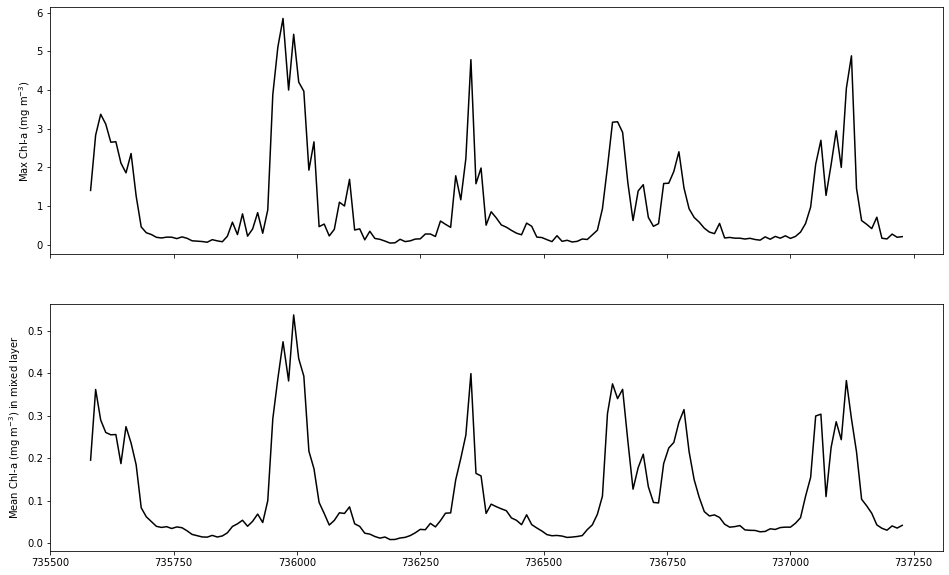